In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Assigning the dataframe url to a variable.
url_df = "https://github.com/Jefexon/Alura-Data-Immersion-3/blob/main/Data/data_experiments.zip?raw=true"

#Assigning the uncompressed csv dataframe to a variable.
df = pd.read_csv(url_df, compression = 'zip')

df.head()

,id,treatment,duration,dose,composite,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,with_drug,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,with_drug,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,with_drug,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,with_drug,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,with_drug,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


### Challenge 1: Do as in *pd.crosstab([df['dose'], df['duration']], df['treatment'], normalize='index')* but, using *"pandas.groupby()"*. (frequency table).

### Challenge 2: Normalize columns using crosstab, so the sum of the values in each columns is 1.

### Challenge 3: Explore other options for *aggfunc=*

### Challenge 4:  Explore *melt*

### Challenge 5: Calculate and analyze the correlation between *g#*s and *c#*s.

### Challenge 6: Study *Plotting a diagonal correlation matrix*

### Challenge 7: Summary
---------------------

### Challenge 1: Do as in *pd.crosstab([df['dose'], df['duration']], df['treatment'], normalize='index')* but, using *"pandas.groupby()"*. (frequency table).

In [36]:
gk = df.groupby(by=['dose', 'duration'])['treatment'].value_counts(normalize=True)
gk.unstack()

treatment      with_control  with_drug
dose duration                         
D1   24            0.077458   0.922542
     48            0.078778   0.921222
     72            0.078577   0.921423
D2   24            0.078487   0.921513
     48            0.078285   0.921715
     72            0.078507   0.921493

### Challenge 2: Normalize columns using crosstab, so the sum of the values in each columns is 1.

In [42]:
tb1 = pd.crosstab([df['dose'], df['duration']], df['treatment'], normalize='columns')
tb1

treatment      with_control  with_drug
dose duration                         
D1   24            0.161308   0.163341
     48            0.183816   0.182750
     72            0.164523   0.164024
D2   24            0.163451   0.163158
     48            0.163451   0.163614
     72            0.163451   0.163113

### Challenge 3: Explore other options for *aggfunc=*

#### aggfunc is an abbreviation of the aggregate function. It takes any function or method and implements it on the value.

Source: https://pythonguides.com/crosstab-in-python-pandas/#Crosstab_pandas_aggfunc

### Challenge 4:  Explore *melt*

This video was helpful:
https://www.youtube.com/watch?v=oY62o-tBHF4

In [47]:
pd.melt(df, id_vars=['id'], value_vars=['composite'])

,id,variable,value
0,id_000644bb2,composite,b68db1d53
1,id_000779bfc,composite,df89a8e5a
2,id_000a6266a,composite,18bb41b2c
3,id_0015fd391,composite,8c7f86626
4,id_001626bd3,composite,7cbed3131
...,...,...,...
23809,id_fffb1ceed,composite,df1d0a5a1
23810,id_fffb70c0c,composite,ecf3b6b74
23811,id_fffc1c3f4,composite,cacb2b860
23812,id_fffcb9e7c,composite,8b87a7a83


### Challenge 5: Calculate and analyze the correlation between *g#*s and *c#*s.

In [68]:
corr = df.corr()
corr

,duration,g0,g1,g2,g3,g4,g5,g6,g7,g8,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
duration,1.000000,0.007610,0.043335,-0.162238,-0.031226,0.027241,-0.081324,-0.030058,0.003499,-0.024291,...,-0.056778,-0.053159,-0.079995,-0.032101,-0.064898,-0.112583,-0.067116,-0.067969,-0.088916,-0.075736
g0,0.007610,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,...,-0.648726,-0.629025,-0.633479,-0.668520,-0.656116,-0.600758,-0.646784,-0.622840,-0.640484,-0.609238
g1,0.043335,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,...,-0.034557,-0.000934,-0.022478,-0.034891,-0.042638,-0.011237,-0.022127,-0.008487,-0.002824,-0.002308
g2,-0.162238,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,...,-0.183325,-0.186048,-0.166786,-0.190383,-0.178312,-0.158105,-0.182540,-0.178812,-0.170152,-0.172124
g3,-0.031226,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,...,-0.091892,-0.045385,-0.089801,-0.089818,-0.081073,-0.016778,-0.083846,-0.049951,-0.079855,-0.037579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c95,-0.112583,-0.600758,-0.011237,-0.158105,-0.016778,-0.378084,0.202341,-0.082060,0.462335,0.573337,...,0.818838,0.803295,0.793390,0.787176,0.819529,1.000000,0.821950,0.811155,0.787529,0.758110
c96,-0.067116,-0.646784,-0.022127,-0.182540,-0.083846,-0.379085,0.194619,-0.079270,0.568159,0.595770,...,0.888795,0.876358,0.867251,0.873935,0.894631,0.821950,1.000000,0.863061,0.819600,0.789649
c97,-0.067969,-0.622840,-0.008487,-0.178812,-0.049951,-0.394904,0.193907,-0.095448,0.543828,0.602902,...,0.860923,0.849142,0.836722,0.840606,0.862876,0.811155,0.863061,1.000000,0.801809,0.775300
c98,-0.088916,-0.640484,-0.002824,-0.170152,-0.079855,-0.366693,0.179097,-0.084408,0.529412,0.596262,...,0.816530,0.818789,0.802289,0.811567,0.824202,0.787529,0.819600,0.801809,1.000000,0.755991


In [77]:
corr_g_c = corr.loc['c0':'c99', 'g0':'g150']
corr_g_c

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,g141,g142,g143,g144,g145,g146,g147,g148,g149,g150
c0,-0.624116,-0.037405,-0.168656,-0.037342,-0.403545,0.209358,-0.103316,0.486478,0.621422,0.435235,...,0.301867,-0.613501,0.206887,-0.696839,-0.508780,-0.368622,-0.750262,-0.464646,-0.036258,0.188516
c1,-0.624810,-0.030558,-0.178692,-0.093505,-0.379840,0.198890,-0.079528,0.553859,0.601678,0.475424,...,0.306495,-0.660329,0.213962,-0.680013,-0.549170,-0.419242,-0.776198,-0.564620,-0.032804,0.233742
c2,-0.639789,-0.039616,-0.176733,-0.085298,-0.392841,0.211988,-0.078782,0.565002,0.597372,0.488331,...,0.289753,-0.664456,0.196995,-0.700685,-0.548088,-0.448744,-0.776879,-0.549988,-0.041068,0.253080
c3,-0.604041,0.011899,-0.156894,-0.029079,-0.357850,0.193327,-0.093048,0.520284,0.564174,0.454065,...,0.292382,-0.609620,0.202679,-0.663536,-0.520016,-0.419634,-0.746047,-0.500957,-0.031831,0.210657
c4,-0.606231,-0.027014,-0.180127,-0.065964,-0.365118,0.206762,-0.055324,0.562647,0.545600,0.485965,...,0.272851,-0.644691,0.205254,-0.673378,-0.529062,-0.455812,-0.757262,-0.519478,-0.020960,0.274631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c95,-0.600758,-0.011237,-0.158105,-0.016778,-0.378084,0.202341,-0.082060,0.462335,0.573337,0.427393,...,0.280260,-0.613385,0.231725,-0.670722,-0.502998,-0.417799,-0.743514,-0.452660,-0.018381,0.239948
c96,-0.646784,-0.022127,-0.182540,-0.083846,-0.379085,0.194619,-0.079270,0.568159,0.595770,0.481492,...,0.296742,-0.658961,0.222062,-0.693222,-0.543757,-0.453528,-0.770767,-0.529880,-0.039603,0.257799
c97,-0.622840,-0.008487,-0.178812,-0.049951,-0.394904,0.193907,-0.095448,0.543828,0.602902,0.467187,...,0.315442,-0.653301,0.209486,-0.680691,-0.542643,-0.437904,-0.774121,-0.540408,-0.026282,0.253332
c98,-0.640484,-0.002824,-0.170152,-0.079855,-0.366693,0.179097,-0.084408,0.529412,0.596262,0.444415,...,0.290524,-0.634001,0.221688,-0.679321,-0.546954,-0.505019,-0.749478,-0.480392,-0.072604,0.299940


<AxesSubplot:>

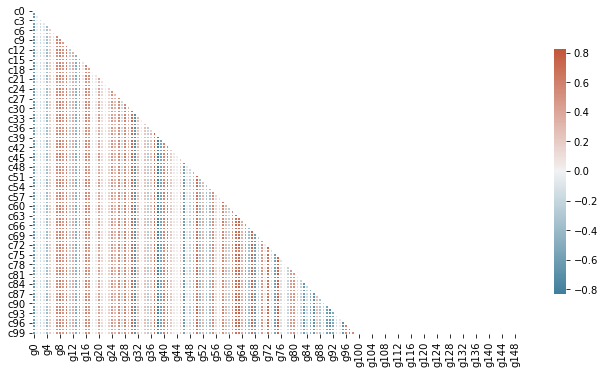

In [78]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_g_c, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_g_c, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Challenge 6: Study *Plotting a diagonal correlation matrix*

### Challenge 7: Summary

In today's lesson we were introduced to pandas.crosstab(), seaborn.scatterplot(), pandas.corr(), plotting a diagonal correlation matrix.